# **Question-1=>**Consider only the below columns and prepare a prediction model for predicting Price.

- Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
cars=pd.read_csv(r"E:\assignments csv  files\ToyotaCorolla.csv",encoding = 'latin1')

In [4]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [5]:
cars


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
cars.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
cars1=cars.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [8]:
cars1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
cars1.rename(columns={"Age_08_04":"age","Quarterly_Tax":"tax"},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_6416\800508022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars1.rename(columns={"Age_08_04":"age","Quarterly_Tax":"tax"},inplace=True)


In [10]:
cars1

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
cars1.isnull().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
tax       0
Weight    0
dtype: int64

In [12]:
cars1.describe()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [13]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   tax     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
cars1[cars1.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
cars1=cars1.drop_duplicates().reset_index(drop=True)

In [16]:
cars1[cars1.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight


Text(0.5, 1.0, 'Weight')

<Figure size 1000x1000 with 0 Axes>

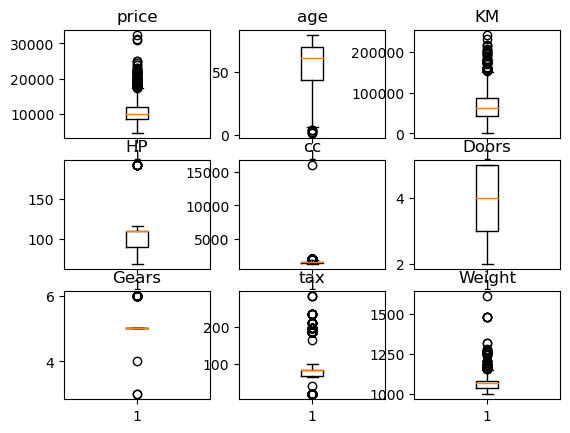

In [17]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(3,3)
ax[0,0].boxplot(cars1["Price"])
ax[0,0].set_title("price")
ax[0,1].boxplot(cars1["age"])
ax[0,1].set_title("age")
ax[0,2].boxplot(cars1["KM"])
ax[0,2].set_title("KM")
ax[1,0].boxplot(cars1["HP"])
ax[1,0].set_title("HP")
ax[1,1].boxplot(cars1["cc"])
ax[1,1].set_title("cc")
ax[1,2].boxplot(cars1["Doors"])
ax[1,2].set_title("Doors")
ax[2,0].boxplot(cars1["Gears"])
ax[2,0].set_title("Gears")
ax[2,1].boxplot(cars1["tax"])
ax[2,1].set_title("tax")
ax[2,2].boxplot(cars1["Weight"])
ax[2,2].set_title("Weight")

In [18]:
import statsmodels.formula.api as smf
model=smf.ols("Price~age+KM+HP+cc+Doors+Gears+tax+Weight",data=cars1).fit()

In [19]:
model.params

Intercept   -5472.540368
age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
tax             3.858805
Weight         16.855470
dtype: float64

In [20]:
(model.tvalues,"\n",model.pvalues)

(Intercept    -3.875273
 age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 tax           2.944198
 Weight       15.760663
 dtype: float64,
 '\n',
 Intercept     1.113392e-04
 age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 cc            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 tax           3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [21]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

In [22]:
cars1.corr()



,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


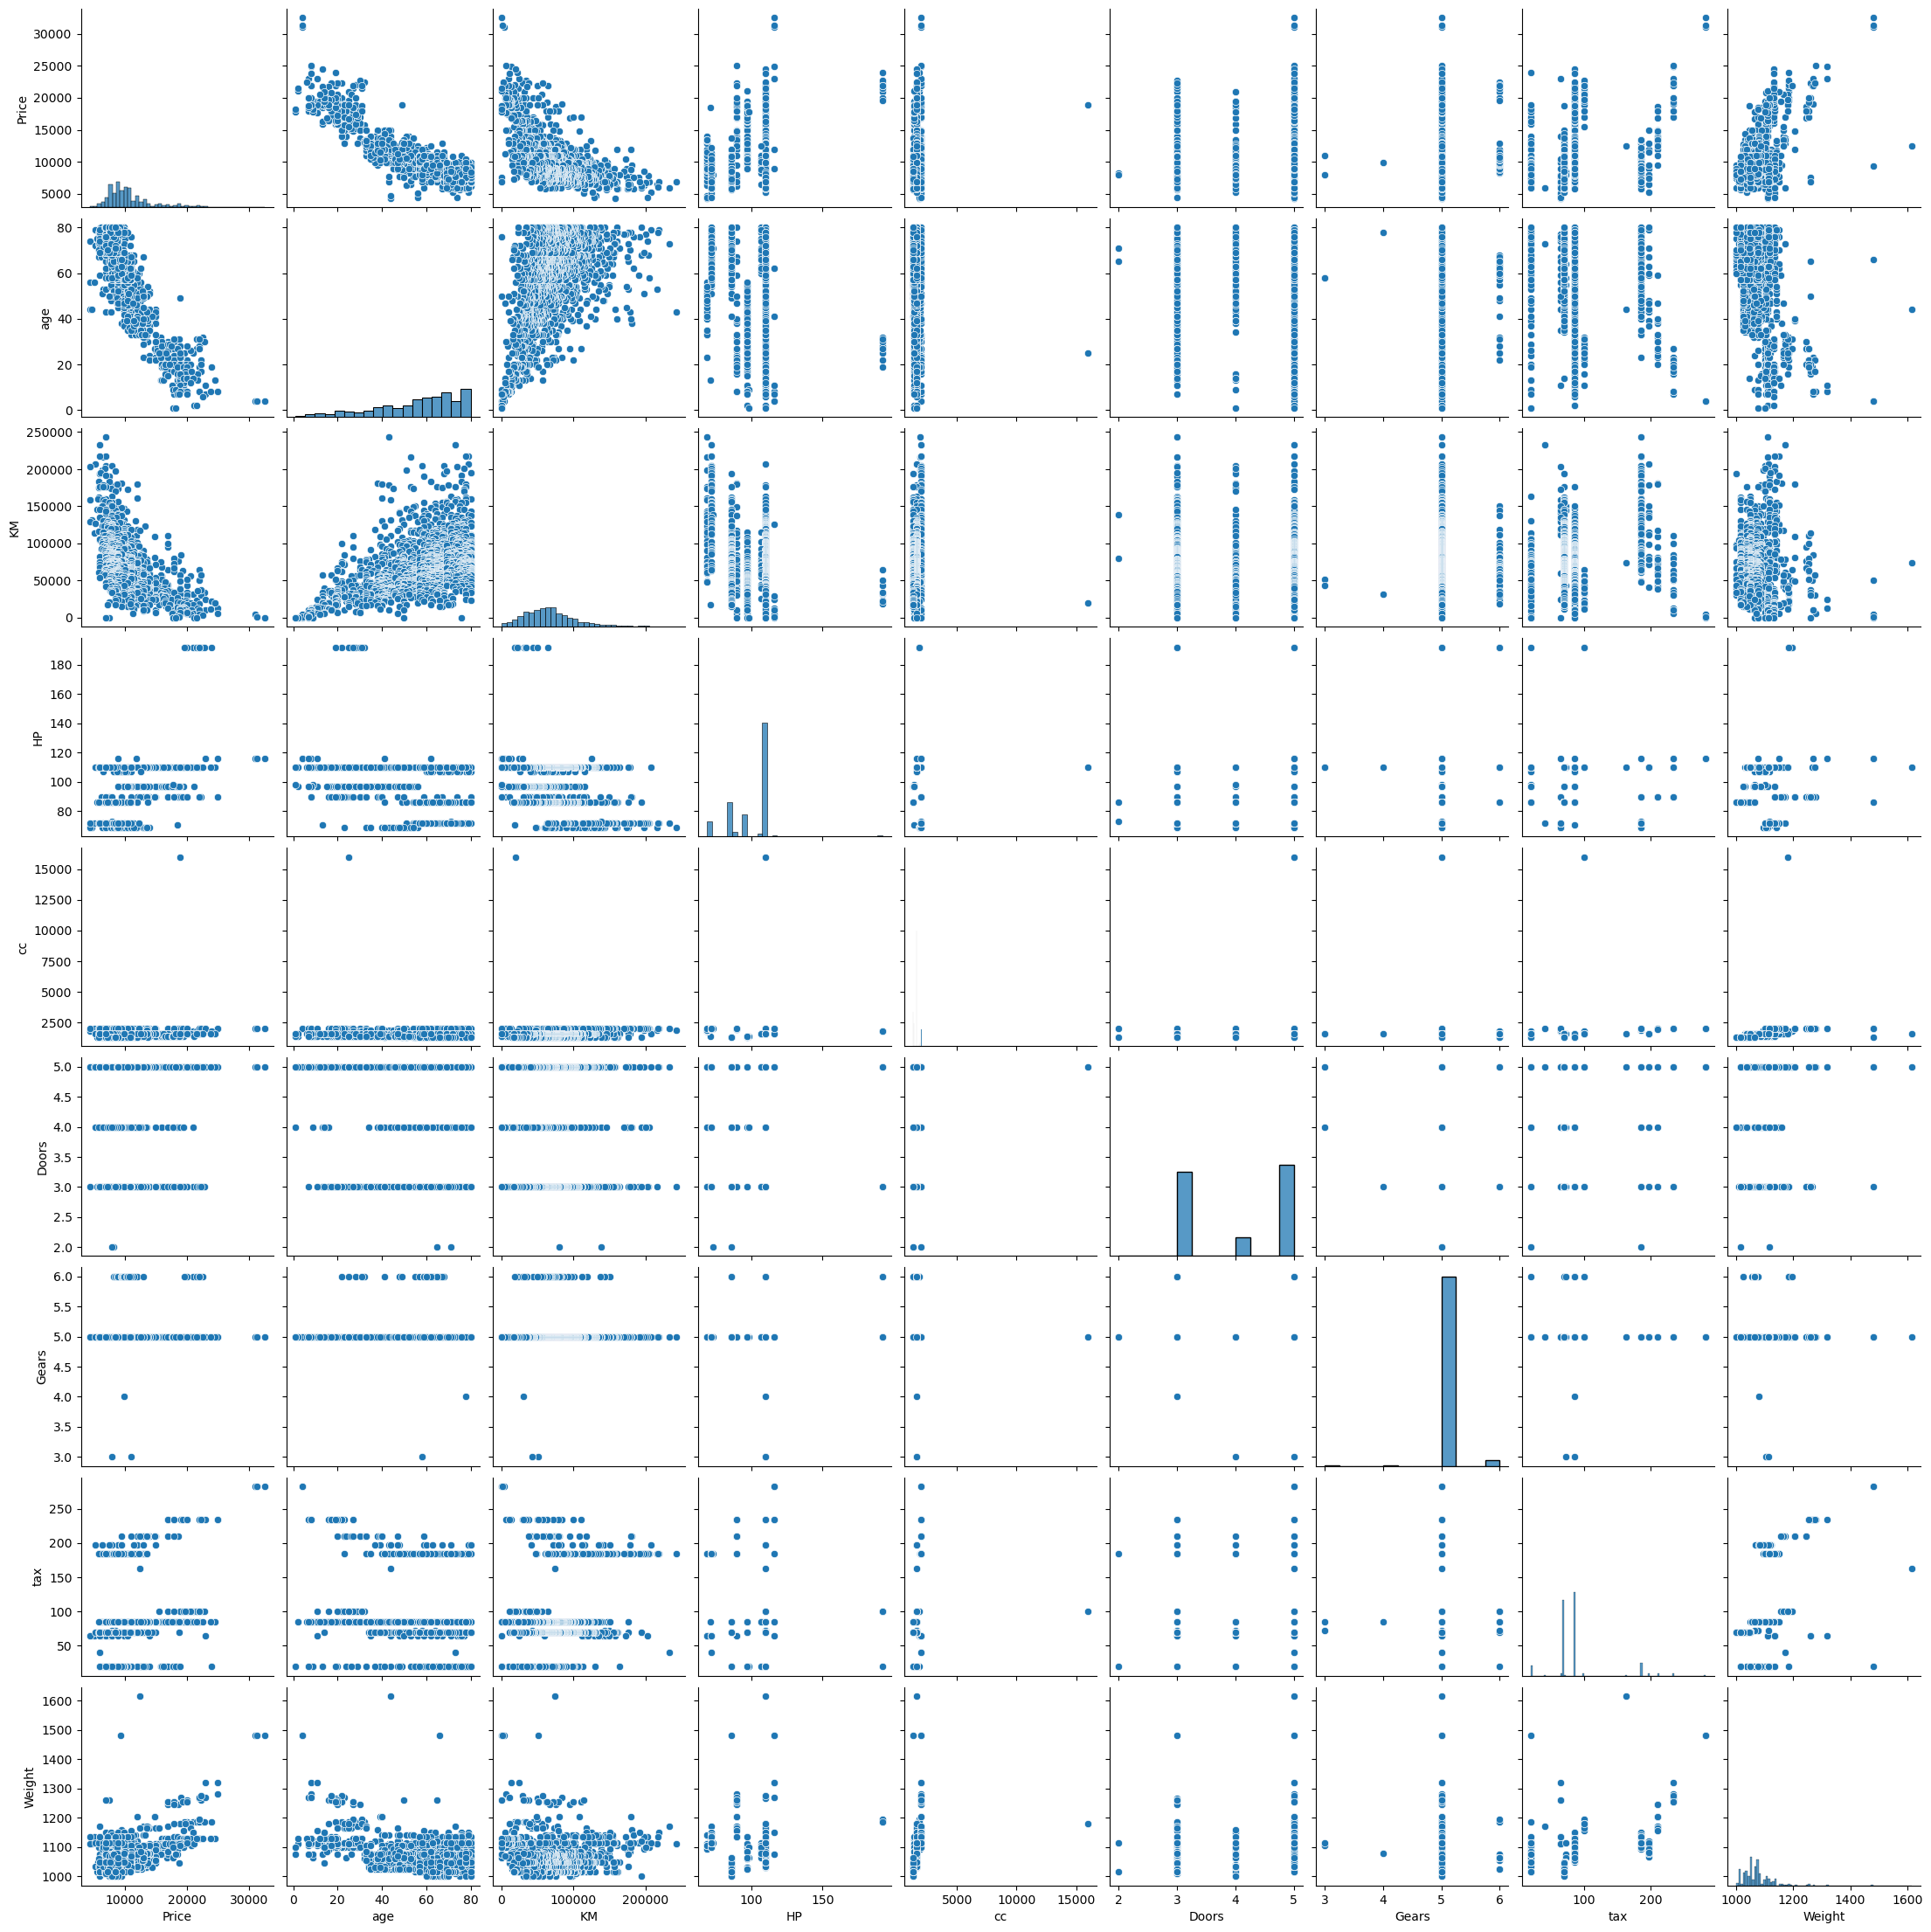

In [23]:
sns.pairplot(cars1)

In [56]:
import statsmodels.formula.api as smf
slr_c=smf.ols("Price~cc",data=cars1).fit()

In [57]:
(slr_c.tvalues,slr_c.pvalues)

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [58]:
import statsmodels.formula.api as smf
slr_d=smf.ols("Price~Doors",data=cars1).fit()

In [59]:
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [60]:
slr_dc=smf.ols("Price~cc+Doors",data=cars1).fit()

In [61]:
slr_dc.tvalues,slr_dc.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [30]:
cars1.corr()

,Price,age,KM,HP,cc,Doors,Gears,tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


In [62]:
rsq_age=smf.ols("age~KM+HP+cc+Doors+Gears+tax+Weight",data=cars1).fit().rsquared
vif_age=(1/(1-rsq_age))

In [63]:
rsq_KM=smf.ols("KM~age+HP+cc+Doors+Gears+tax+Weight",data=cars1).fit().rsquared
vif_KM=(1/(1-rsq_KM))

In [64]:
rsq_HP=smf.ols("HP~KM+age+cc+Doors+Gears+tax+Weight",data=cars1).fit().rsquared
vif_HP=(1/(1-rsq_HP))



In [65]:
rsq_cc=smf.ols("cc~KM+HP+age+Doors+Gears+tax+Weight",data=cars1).fit().rsquared
vif_cc=(1/(1-rsq_cc))

In [66]:
rsq_Doors=smf.ols("Doors~KM+HP+cc+age+Gears+tax+Weight",data=cars1).fit().rsquared
vif_Doors=(1/(1-rsq_Doors))

In [67]:
rsq_Gears=smf.ols("age~KM+HP+cc+Doors+Gears+tax+Weight",data=cars1).fit().rsquared
vif_Gears=(1/(1-rsq_Gears))

In [68]:
rsq_tax=smf.ols("tax~KM+HP+cc+Doors+Gears+age+Weight",data=cars1).fit().rsquared
vif_tax=(1/(1-rsq_age))

In [69]:
rsq_Weight=smf.ols("Weight~KM+HP+cc+Doors+Gears+tax+age",data=cars1).fit().rsquared
vif_Weight=(1/(1-rsq_Weight))

In [70]:
d1={"variable":["age","KM","HP","cc","Doors","Gears","tax","Weight"],"vif":[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_tax,vif_Weight]}

In [71]:
vif=pd.DataFrame(d1)

In [41]:
vif

,variable,vif
0,age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.876236
6,tax,1.876236
7,Weight,2.487180


In [42]:
import statsmodels.formula.api as smf
model=smf.ols("Price~age+KM+HP+cc+Gears+tax+Weight",data=cars1).fit()
f'AIC:{model.aic}, rsq_cc:{rsq_cc}'

'AIC:24748.40774021839, rsq_cc:0.1405023880011912'

In [43]:
model.rsquared,model.rsquared_adj

(0.862519974643015, 0.8618455806854124)

In [44]:
import statsmodels.formula.api as smf
model=smf.ols("Price~age+KM+HP+Doors+Gears+tax+Weight",data=cars1).fit()
f'AIC:{model.aic}, rsq_Doors:{rsq_Doors}'

'AIC:24750.150089502546, rsq_Doors:0.13486567399256388'

In [45]:
model.rsquared,model.rsquared_adj

(0.8623529476715985, 0.8616777343805693)

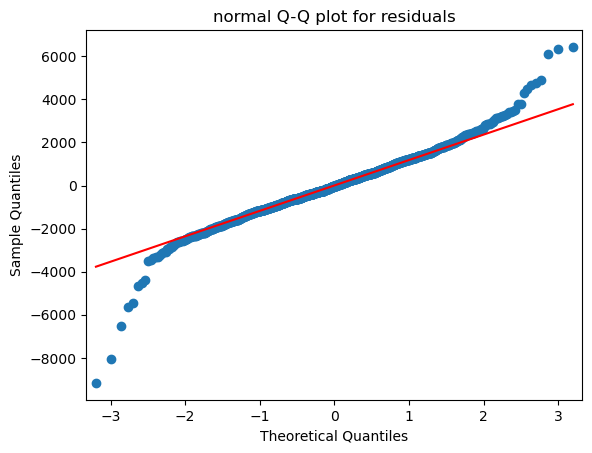

In [46]:
#residual analysis
#test for normality of residuals(Q-Q plot) using residuals model
sm.qqplot(model.resid,line="q")
plt.title("normal Q-Q plot for residuals")
plt.show()

In [47]:
list(np.where(model.resid>6000))#outlier detection from above graph

[array([109, 146, 522], dtype=int64)]

In [48]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

Text(0, 0.5, 'standardized redidual values')

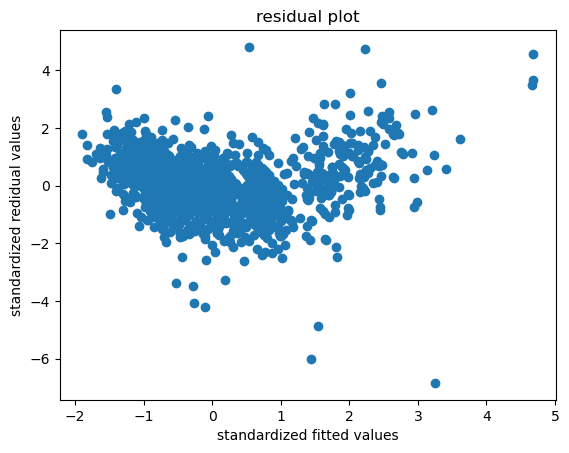

In [49]:
def standard_values(vals_cars): 
  return (vals_cars-vals_cars.mean())/vals_cars.std()
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("residual plot")
plt.xlabel("standardized fitted values")
plt.ylabel("standardized redidual values")

eval_env: 1


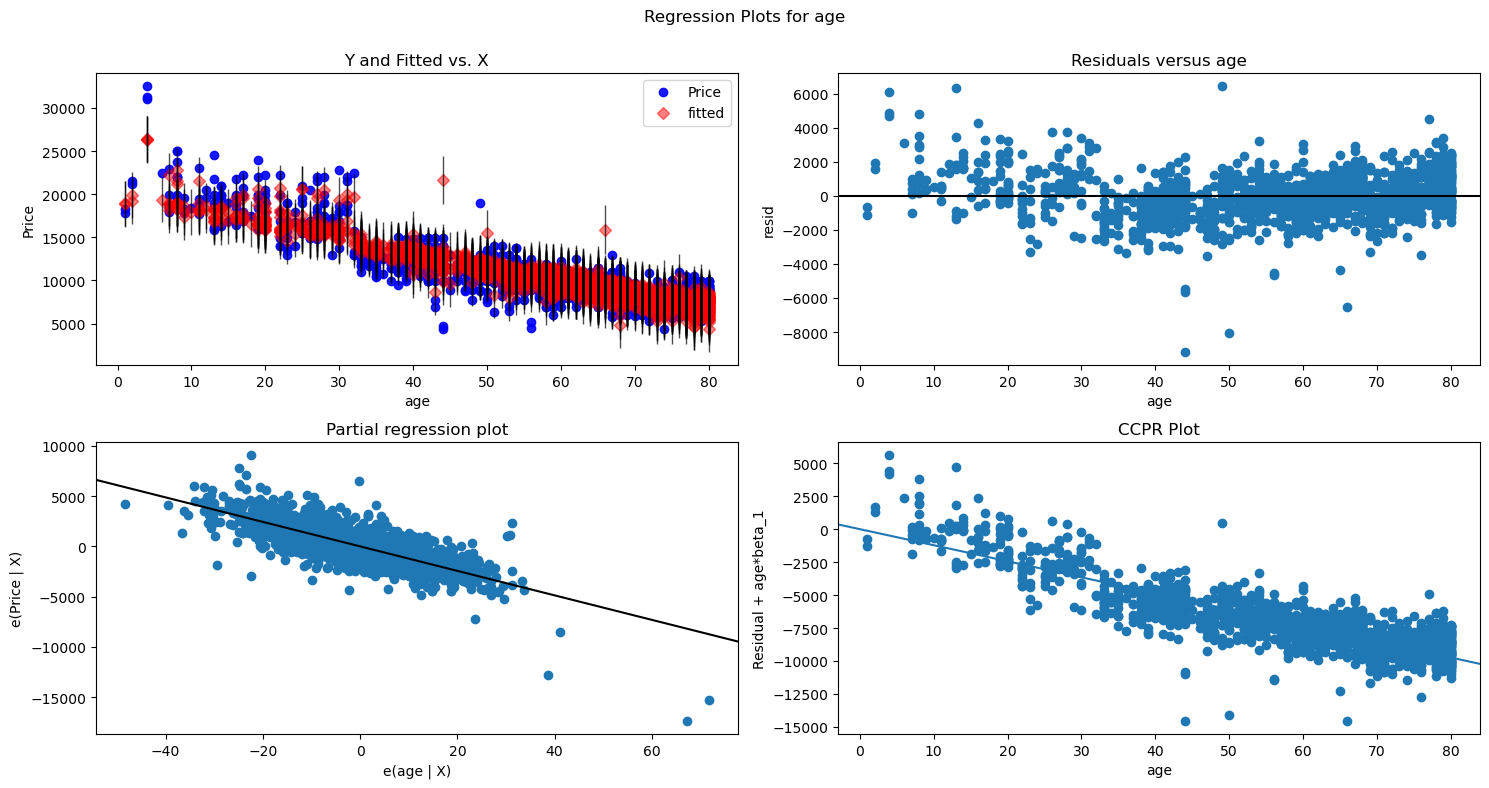

In [50]:
#test for errors or residuals vs Regressors or independent "x" variables
fig_cars=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"age",fig=fig_cars)
plt.show()

eval_env: 1


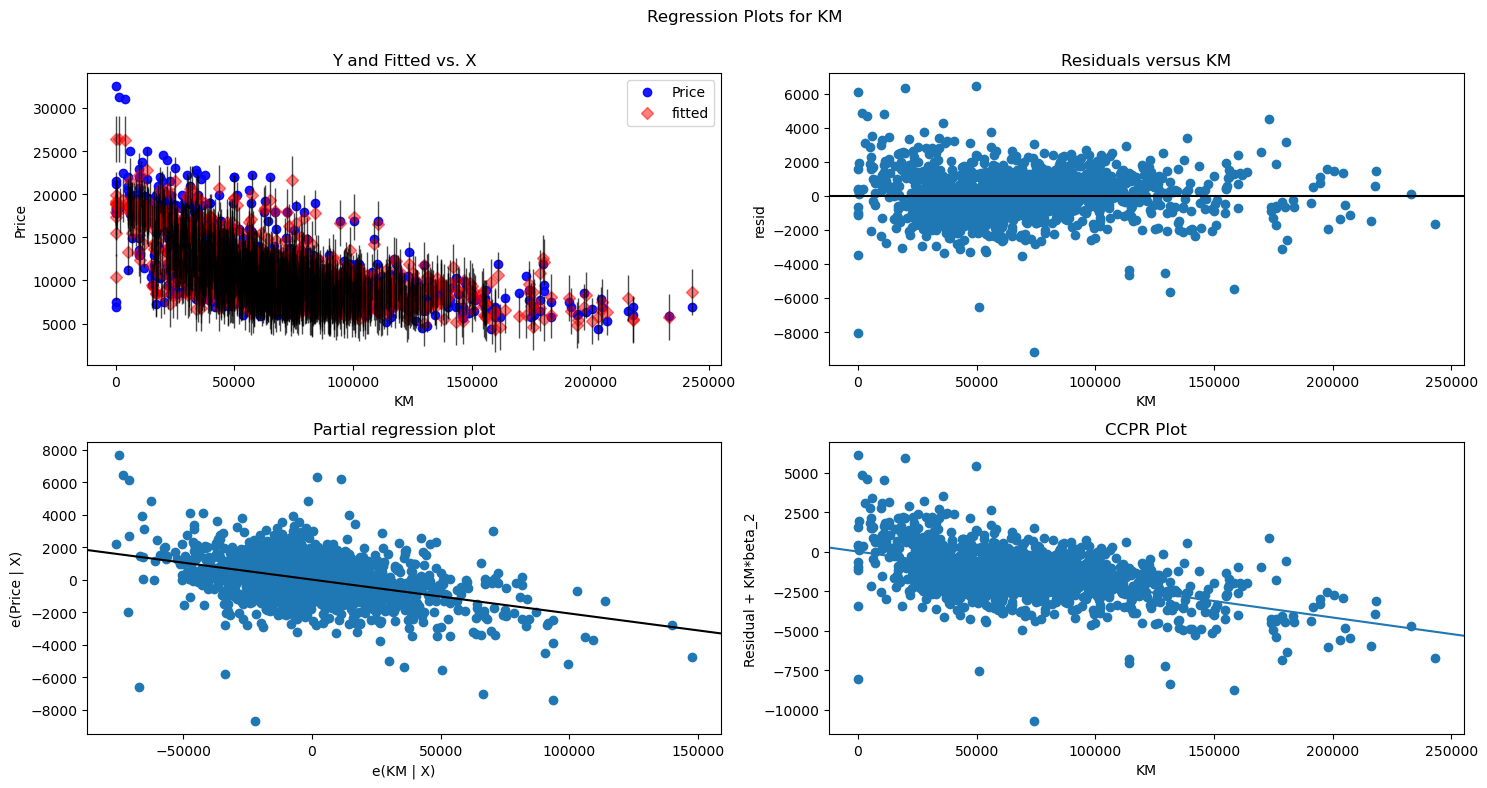

In [51]:
fig_cars=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig_cars)
plt.show()

eval_env: 1


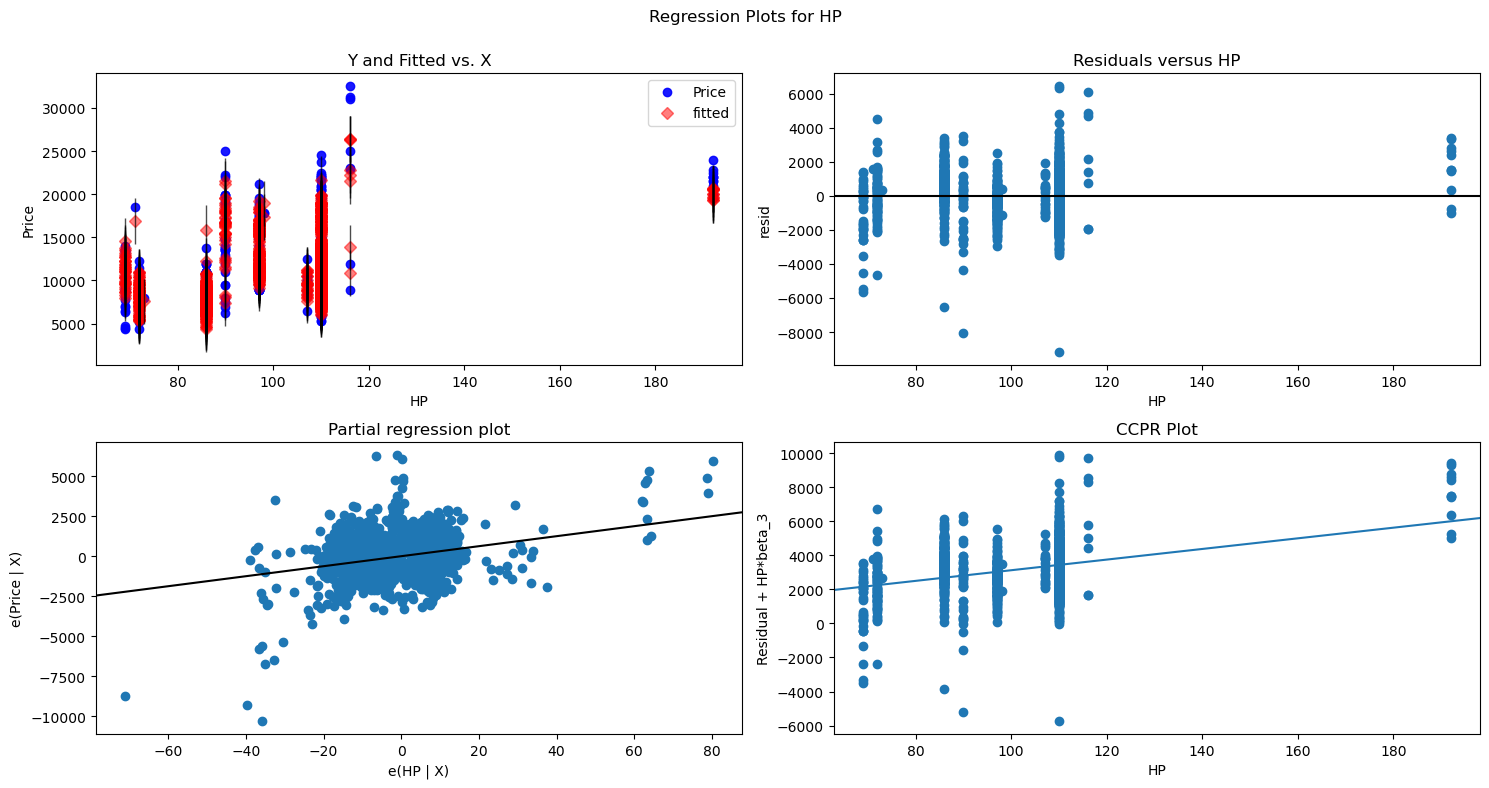

In [52]:
fig_cars=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig_cars)
plt.show()


eval_env: 1


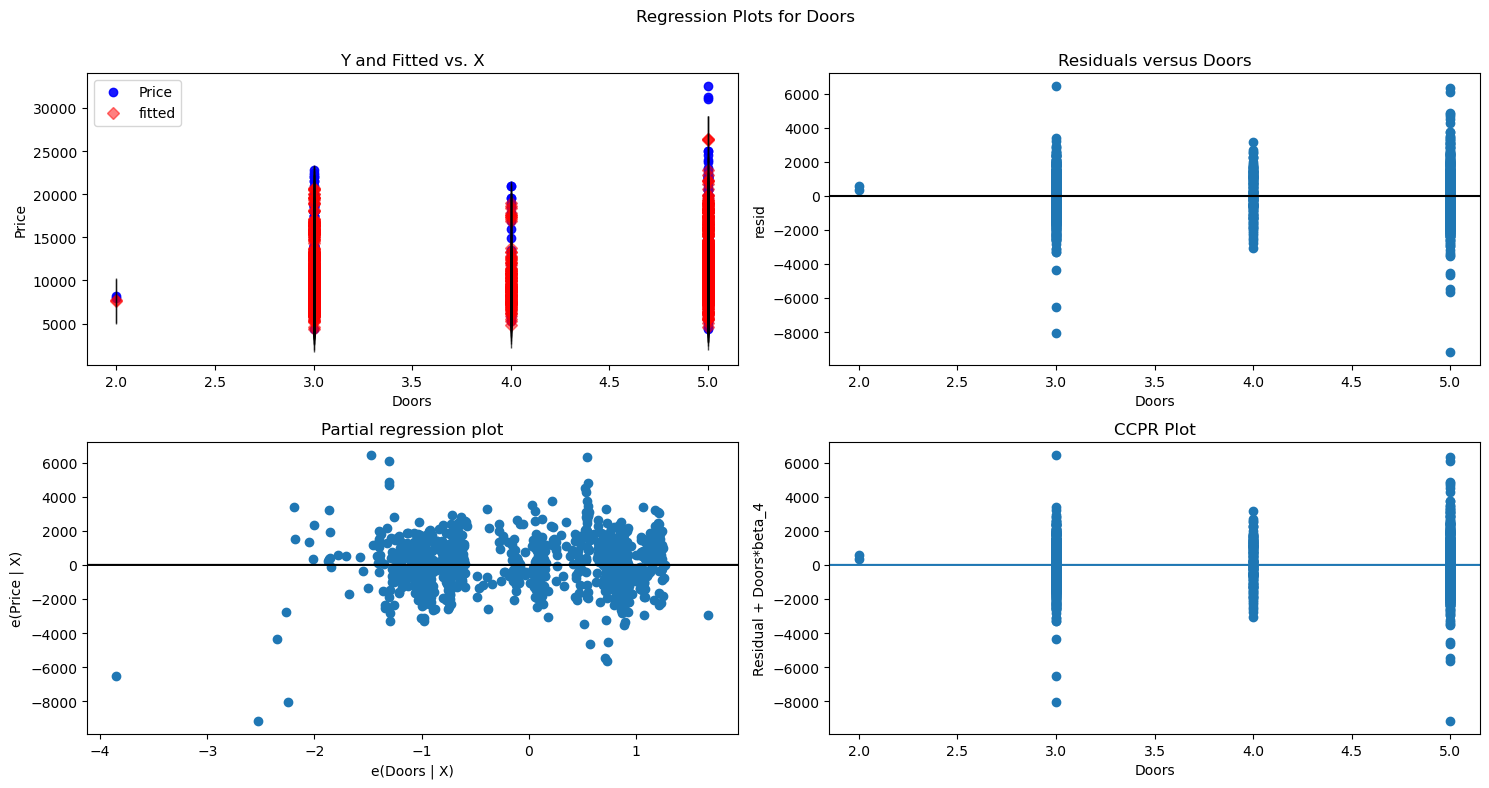

In [53]:
fig_cars=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig_cars)
plt.show()


eval_env: 1


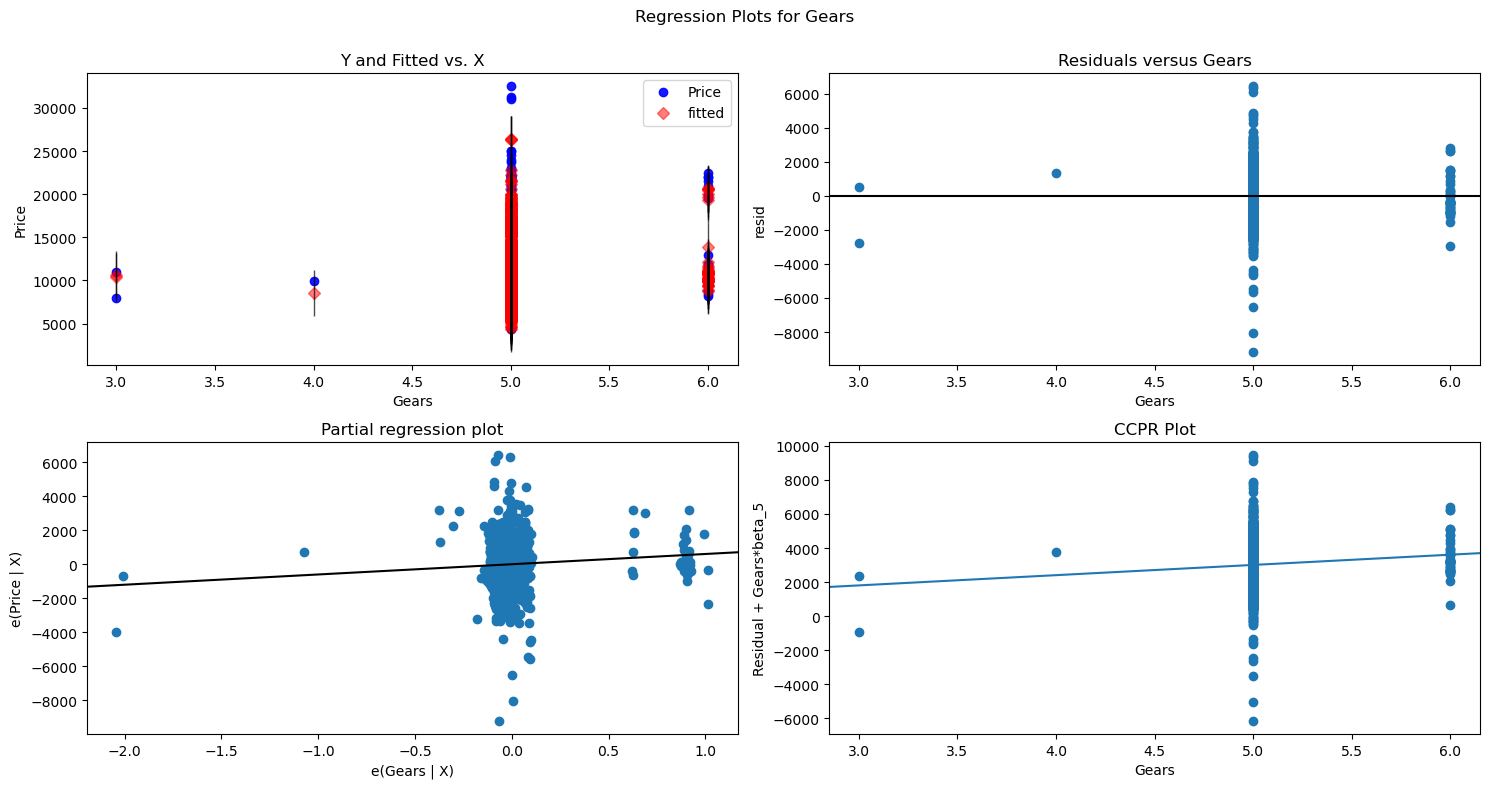

In [54]:
fig_cars=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig_cars)
plt.show()


eval_env: 1


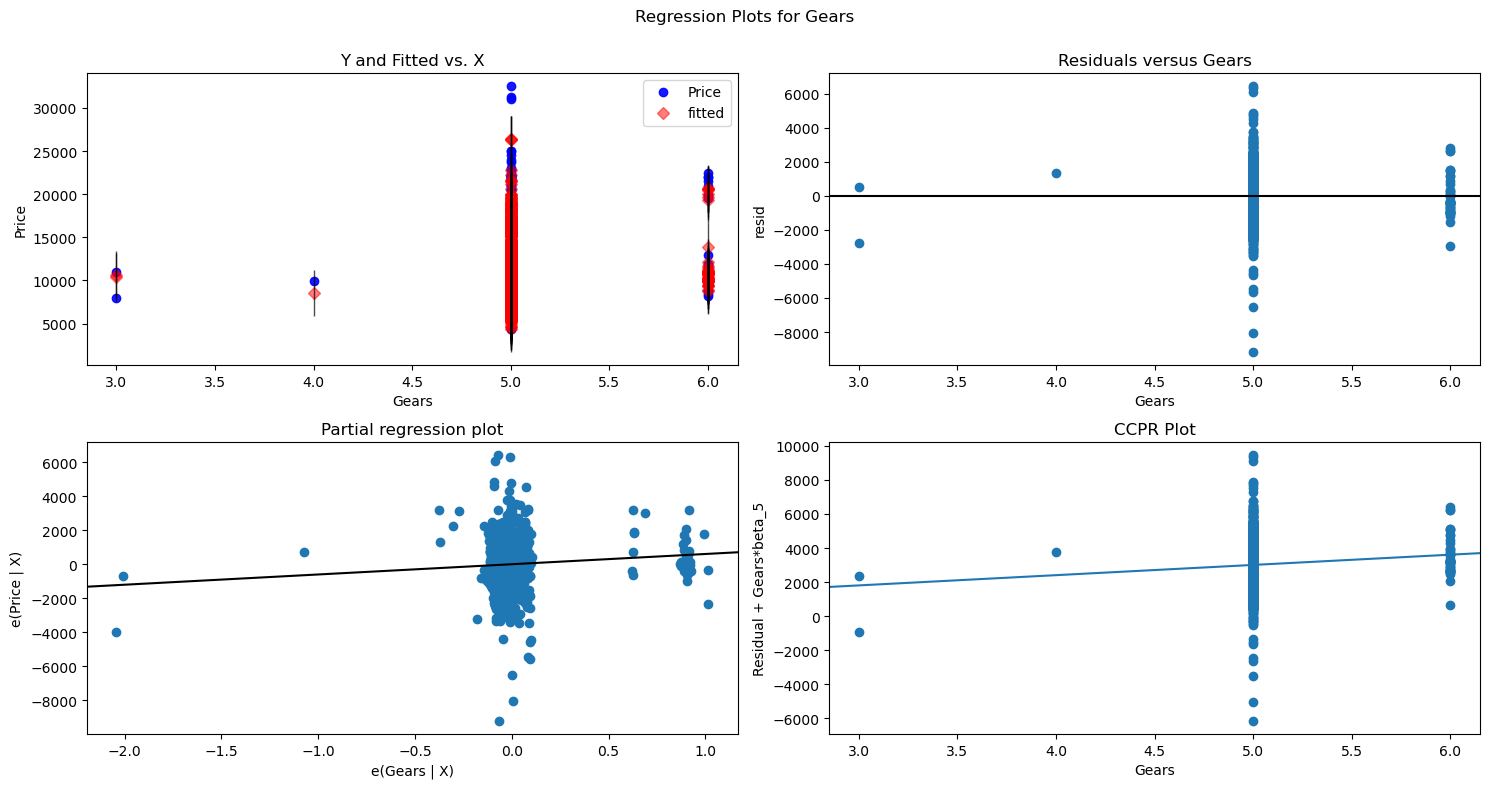

In [55]:
fig_cars=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig_cars)
plt.show()


In [72]:
new_data_cars=pd.DataFrame({'age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"tax":69,"Weight":1012},index=[0])
new_data_cars


,age,KM,HP,cc,Doors,Gears,tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [73]:
model.predict(new_data_cars)

0    14915.944942
dtype: float64

# Question-2** Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit  -- profit of each state in the past few years

In [75]:
start=pd.read_csv(r"E:\assignments csv  files\50_Startups.csv")

In [76]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [77]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [78]:
start.shape

(50, 5)

In [79]:
start.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [80]:
start.rename(columns={"R&D Spend":"RDS","Administration":"adm","Marketing Spend":"mark"},inplace=True)

In [81]:
start

,RDS,adm,mark,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Text(0.5, 1.0, 'Profit')

<Figure size 1000x1000 with 0 Axes>

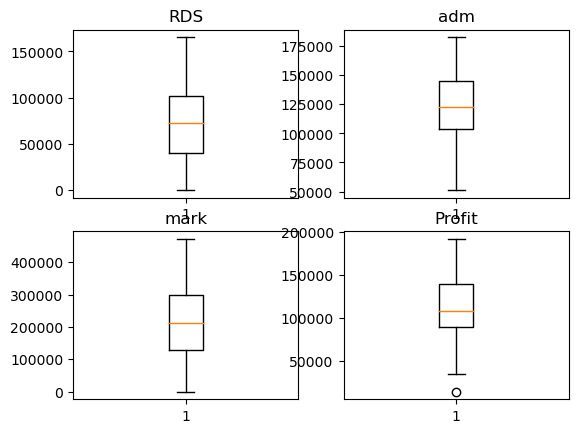

In [82]:
fig=plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,2)
ax[0,0].boxplot(start["RDS"])
ax[0,0].set_title("RDS")
ax[0,1].boxplot(start["adm"])
ax[0,1].set_title("adm")
ax[1,0].boxplot(start["mark"])
ax[1,0].set_title("mark")
ax[1,1].boxplot(start["Profit"])
ax[1,1].set_title("Profit")

In [83]:
start.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_6416\1734851009.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  start.corr()


,RDS,adm,mark,Profit
RDS,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
mark,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


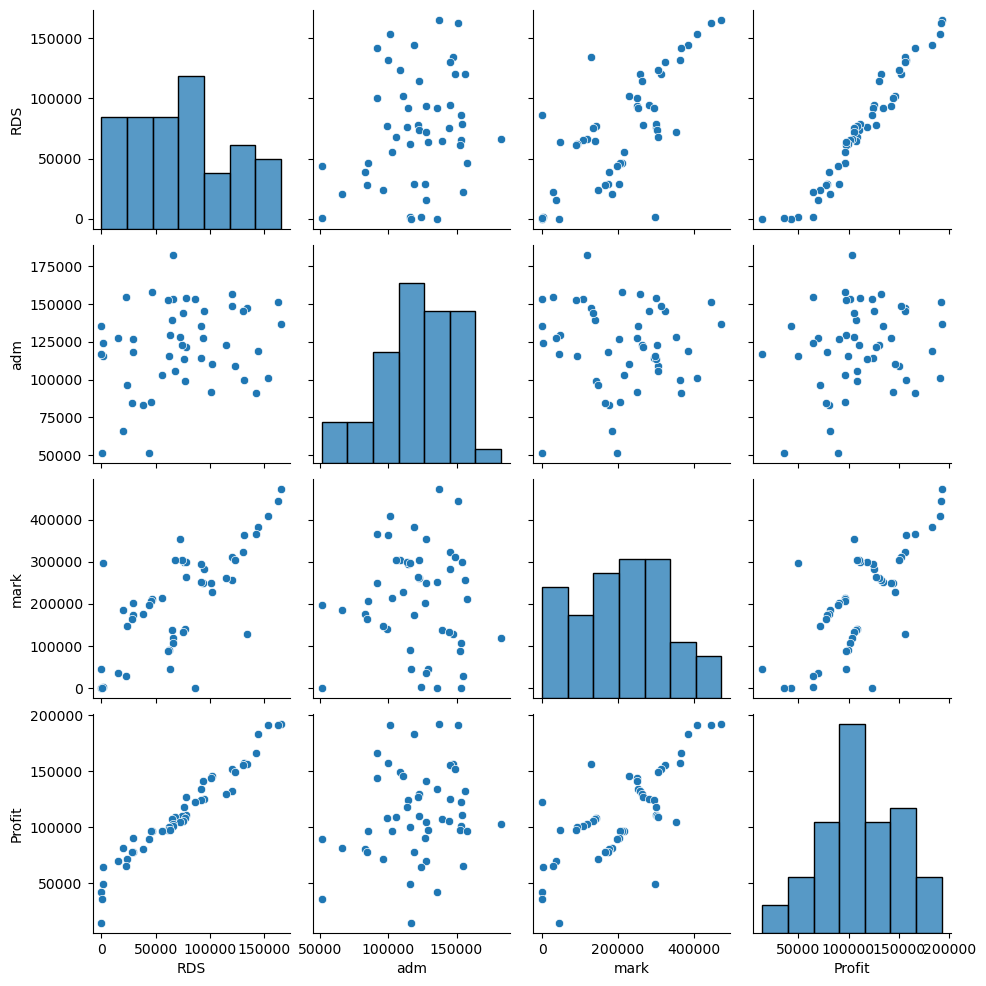

In [84]:
sns.pairplot(start)

In [85]:
import statsmodels.formula.api as smf
model=smf.ols("Profit~RDS+adm+mark",data=start).fit()

In [86]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RDS          17.846374
 adm          -0.525507
 mark          1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 adm          6.017551e-01
 mark         1.047168e-01
 dtype: float64)

In [87]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [88]:
import statsmodels.formula.api as smf
model1=smf.ols("Profit~adm",data=start).fit()

In [89]:
model1.tvalues,model1.pvalues

(Intercept    3.040044
 adm          1.419493
 dtype: float64,
 Intercept    0.003824
 adm          0.162217
 dtype: float64)

In [90]:
model2=smf.ols("Profit~mark",data=start).fit()

In [91]:
model2.tvalues,model2.pvalues

(Intercept    7.808356
 mark         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 mark         4.381073e-10
 dtype: float64)

In [92]:
model3=smf.ols("Profit~mark+adm",data=start).fit()
model3.tvalues,model3.pvalues

(Intercept    1.142741
 mark         8.281039
 adm          2.467779
 dtype: float64,
 Intercept    2.589341e-01
 mark         9.727245e-11
 adm          1.729198e-02
 dtype: float64)

In [93]:
rsq_RDS=smf.ols("RDS~adm+mark",data=start).fit().rsquared
vif_RDS=1/(1-rsq_RDS)

In [94]:
rsq_mark=smf.ols("mark~RDS+adm",data=start).fit().rsquared
vif_mark=1/(1-rsq_mark)


In [95]:
rsq_adm=smf.ols("adm~RDS+mark",data=start).fit().rsquared
vif_adm=1/(1-rsq_adm)

In [96]:
d1={"variable":["RDS","adm","mark"],"vif":[vif_RDS,vif_mark,vif_adm]}

In [97]:
df=pd.DataFrame(d1)
df

,variable,vif
0,RDS,2.468903
1,adm,2.326773
2,mark,1.175091


In [98]:
model=smf.ols("Profit~RDS+adm+mark",data=start).fit()

In [99]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RDS          17.846374
 adm          -0.525507
 mark          1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 adm          6.017551e-01
 mark         1.047168e-01
 dtype: float64)

In [100]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [101]:
new_data=pd.DataFrame({"RDS":70000,"adm":90000,"mark":14000},index=[0])
new_data

,RDS,adm,mark
0,70000,90000,14000


In [102]:
model.predict(new_data)

0    104490.002236
dtype: float64